In [9]:
!pip install opencv-python

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.2 MB 1.3 MB/s eta 0:00:30
     ---------------------------------------- 0.0/38.2 MB 1.3 MB/s eta 0:00:30
     --------------------------------------- 0.1/38.2 MB 491.5 kB/s eta 0:01:18
     --------------------------------------- 0.1/38.2 MB 653.6 kB/s eta 0:00:59
     --------------------------------------- 0.2/38.2 MB 807.1 kB/s eta 0:00:48
     --------------------------------------- 0.2/38.2 MB 958.6 kB/s eta 0:00:40
     --------------------------------------- 0.3/38.2 MB 916.0 kB/s eta 0:00:42
     ---------------------------------------- 0.4/38.2 MB 1.1 MB/s eta 0:00:35
     ---------------------------------------- 0.4/38.2 MB 1.0 MB/s eta 0:00:37
      --------------------------------------- 0.6/38.2 MB 1.3 MB/s eta 0:00:30
      --------------------------------------- 0.8/38.2 MB 1.5 MB/s eta 0:00:25
      --------------------------------------- 0.9/38.2

In [1]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import glob
import cv2
#import zipfile

In [2]:
#zip_path='/content/cbir-dataset.zip'

In [3]:
#with zipfile.ZipFile(zip_path,'r') as pics:
  #pics.extractall('/content/cbir_imgs')

In [4]:
xtrain=[]
for img_path in glob.glob(r'C:\Users\Saimum Adil Khan\Downloads\Compressed\dataset\*.jpg'):
    img=cv2.imread(img_path)
    img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    #x=image.img_to_array(img)
    xtrain.append(img_rgb)
xtrain=np.array(xtrain)

In [5]:
xtrain[0].shape

(224, 224, 3)

In [6]:
xtrain.shape

(4738, 224, 224, 3)

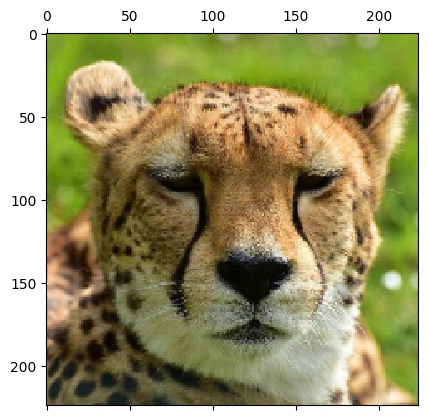

In [9]:
from matplotlib import pyplot as plt
plt.matshow(xtrain[2])

In [10]:
xtrain_preprocessed=preprocess_input(xtrain)

In [11]:
model=VGG16(weights='imagenet',include_top=False)

In [12]:
train_feature=model.predict(xtrain_preprocessed)

149/149 [==============================] - 2127s 14s/step


In [13]:
train_features_flat=train_feature.reshape(train_feature.shape[0],-1)

In [14]:
nn=NearestNeighbors(n_neighbors=20)

In [15]:
nn.fit(train_features_flat)

NearestNeighbors(n_neighbors=20)

In [16]:
inp_img_path=r'C:\Users\Saimum Adil Khan\Downloads\Compressed\dataset\25.jpg'
inp_image=cv2.imread(inp_img_path)
inp_resized=cv2.resize(inp_image,(224,224),interpolation=cv2.INTER_LINEAR)
inp_img_rgb=cv2.cvtColor(inp_resized,cv2.COLOR_BGR2RGB)

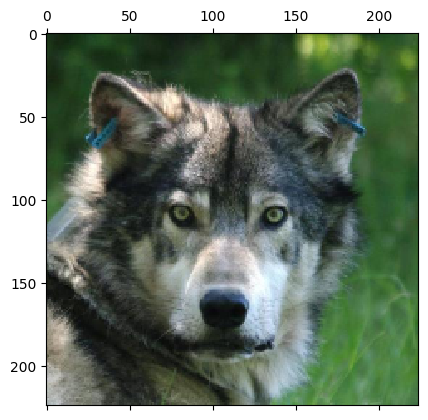

In [17]:
plt.matshow(inp_img_rgb)

In [18]:
inp_img_preprocess=preprocess_input(inp_img_rgb.reshape(1,224,224,3))

In [19]:
inp_img_feature=model.predict(inp_img_preprocess)

1/1 [==============================] - 0s 455ms/step


In [20]:
inp_img_flat=inp_img_feature.reshape(1,-1)

In [21]:
distances,indices=nn.kneighbors(inp_img_flat)

In [22]:
similar_img=xtrain[indices]

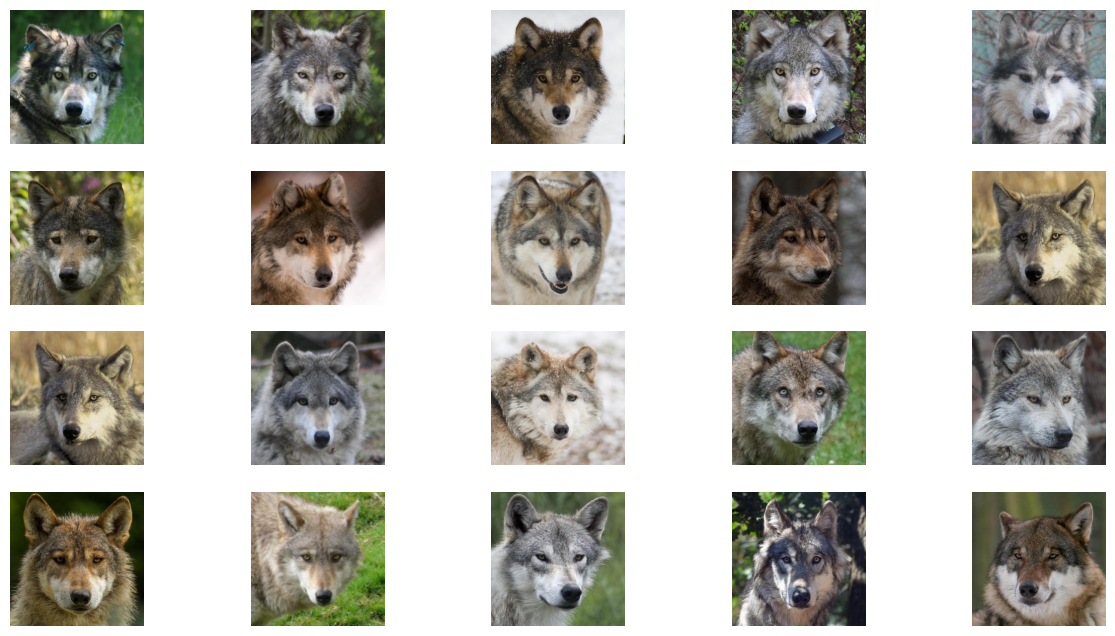

In [23]:
import matplotlib.pyplot as plt

# Visualize the 20 most similar images
fig, axes = plt.subplots(4, 5, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(similar_img[0][i].astype('uint8'))
    ax.axis('off')
plt.show()


In [24]:
import pickle as pk

In [25]:
with open('cbir_nn.pkl','wb') as f:
  pk.dump(nn,f)

In [26]:
from tensorflow.keras.models import save_model

In [27]:
model.compile(metrics=['accuracy'])

In [28]:
save_model(model,'cbir_vgg16.h5')

In [29]:
np.save('xtrain.npy', xtrain)